# 🚀 Autoencoders - Generate

In this notebook, we'll walk through the steps required to generate images using the autoencoder trained the fashion MNIST dataset.

## Table of contents
0. [Parameters](#parameters)
1. [Prepare the Data](#prepare)
2. [Load the Model](#model)
3. [Reconstruct using the autoencoder](#reconstruct)
4. [Embed using the encoder](#encode)
5. [Generate using the decoder](#decode)
6. [Explore the latent space](#explore)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
%%html
<style>table {display: inline-block}</style>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.data import Dataset
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image_dataset_from_directory

from utils.image import preprocess, noise, display
from utils.datasets import sample_batches, sample_batch

## 0. Parameters <a name="parameters"></a>

In [5]:
IMAGE_SIZE = 32
NOISE_FACTOR = 0.4
EMBEDDING_DIM = 2

## 1. Prepare the data <a name="prepare"></a>

In [6]:
# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
# Preprocess the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

## 2. Load the model <a name="model"></a>

In [8]:
## Load the model trained in 01_train.ipynb
autoencoder = load_model("./models/autoencoder", compile=False)
encoder = load_model("./models/encoder", compile=False)
decoder = load_model("./models/decoder", compile=False)

## 3. Reconstruct using the autoencoder <a name="reconstruct"></a>

In [9]:
# Select a subset of the test set
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

Example real clothing items


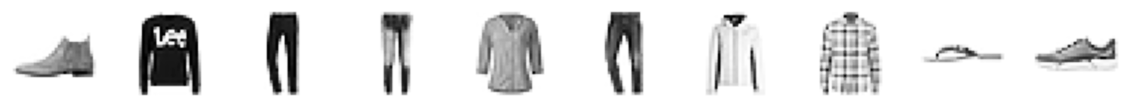

Reconstructions


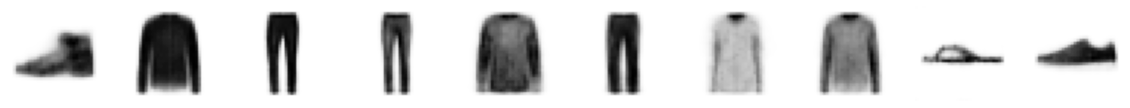

In [10]:
# Create autoencoder predictions and display
predictions = autoencoder.predict(example_images)

print("Example real clothing items")
display(example_images)
print("Reconstructions")
display(predictions)

## 4. Embed using the encoder <a name="encode"></a>

In [11]:
# Encode the example images
embeddings = encoder.predict(example_images)

In [12]:
# Some examples of the embeddings
print(embeddings[:10])

[[-1.7991419   0.44082874]
 [ 1.7311113   5.806888  ]
 [ 6.338135   -0.92346543]
 [ 3.6907012  -0.8659241 ]
 [ 0.40644604  3.0101545 ]
 [ 4.79879     0.09573597]
 [ 0.92252976  1.5048372 ]
 [ 0.84302217  2.6220179 ]
 [-1.8067104  -2.0343697 ]
 [-3.3799665  -1.0624449 ]]


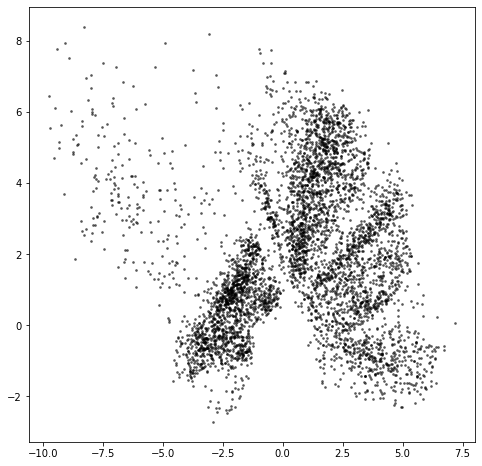

In [13]:
# Show the encoded points in 2D space
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

In [14]:
np.random.uniform((1,3), (2,4), size = (10,2))

array([[1.32059176, 3.46801546],
       [1.11975804, 3.03480935],
       [1.02240504, 3.59066694],
       [1.59981556, 3.19600828],
       [1.53389535, 3.20999292],
       [1.70609976, 3.40704524],
       [1.43204253, 3.09915677],
       [1.80291867, 3.15903771],
       [1.65104646, 3.06424026],
       [1.01886606, 3.42847069]])

## 5. Generate using the decoder <a name="decode"></a>

In [15]:
#Get the range of the existing embeddings
mins, maxs = np.min(embeddings, axis = 0), np.max(embeddings, axis = 0)

#Sample some points in the latent space
grid_width, grid_height = (6,3)
grid = np.random.uniform(mins, maxs, size=(grid_width * grid_height,2))

In [16]:
# Decode the sampled points
reconstructions = decoder.predict(grid)

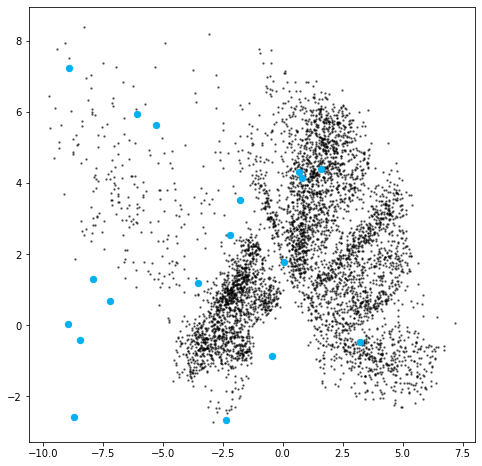

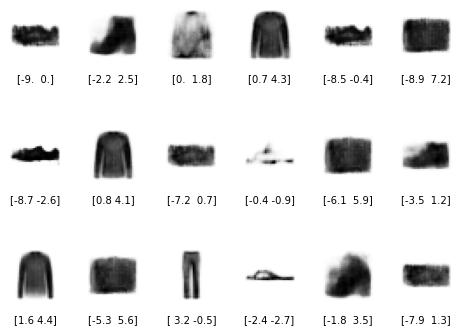

In [17]:
# Draw a plot of...
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(grid[:, 0], grid[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, str(np.round(grid[i,:], 1)), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

## 6. Explore the latent space <a name="explore"></a>

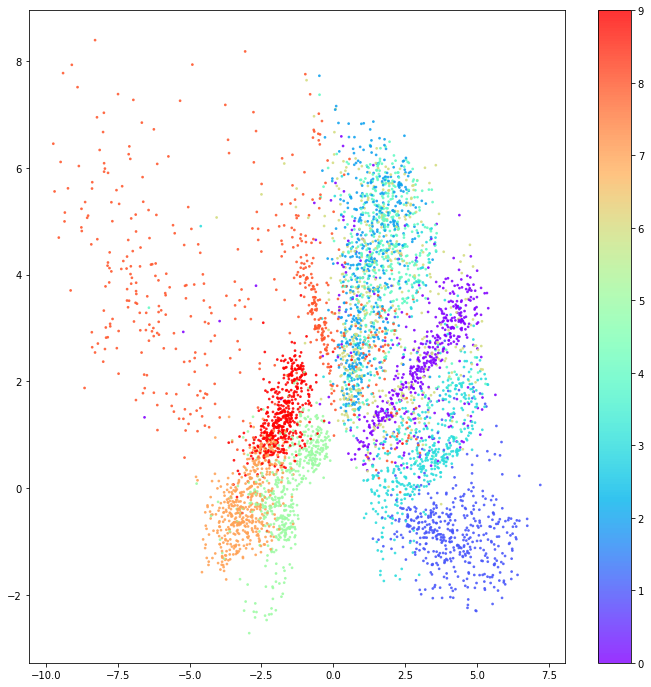

In [50]:
# Colour the embeddings by their label (clothing type - see table)
example_labels = y_test[:n_to_predict]

figsize = 12
plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3)
plt.colorbar()
plt.show()

| ID | Clothing Label |
| :- | :- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

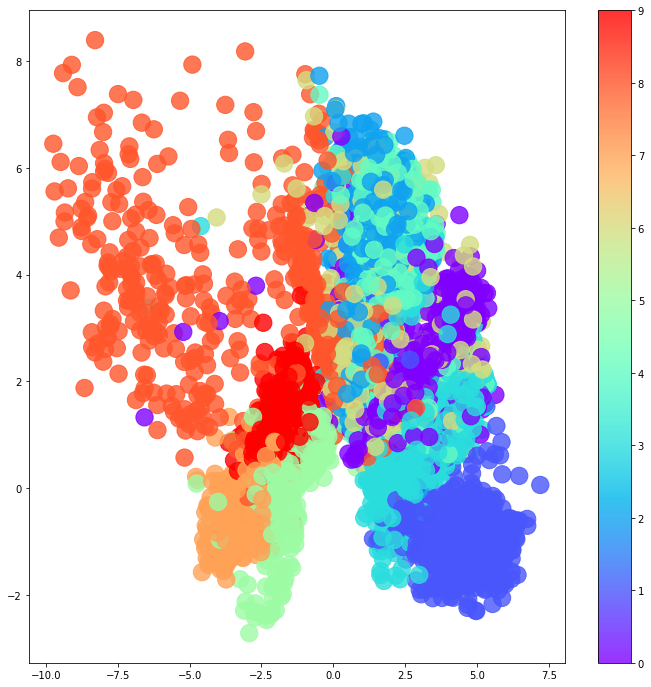

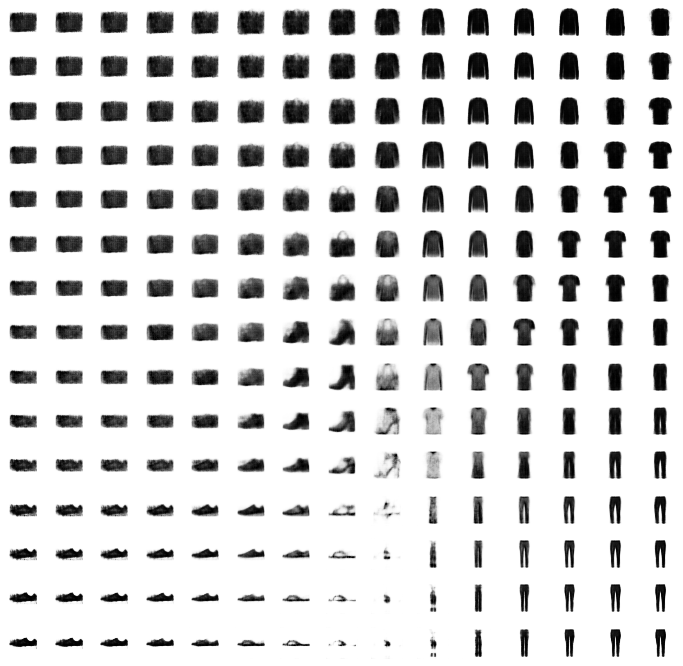

In [55]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=300)
plt.colorbar()

x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), grid_size)
y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")
    